In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [119]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12 entries, 2020-02-25 to 2020-03-07
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              12 non-null     datetime64[ns]
 1   hospitalized      12 non-null     int64         
 2   intensive_care    12 non-null     int64         
 3   self_quarantined  12 non-null     int64         
 4   active            12 non-null     int64         
 5   healed            12 non-null     int64         
 6   dead              12 non-null     int64         
 7   total_confirmed   12 non-null     int64         
 8   tested            12 non-null     int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 960.0 bytes


In [121]:
df = df.drop(columns='date')
df.tail()

,hospitalized,intensive_care,self_quarantined,active,healed,dead,total_confirmed,tested
date,,,,,,,,
2020-03-03,292,63,73,428,11,27,466,2511
2020-03-04,312,66,65,443,116,28,587,3981
2020-03-05,444,56,90,590,138,41,769,2525
2020-03-06,604,111,-95,620,109,49,778,3997
2020-03-07,257,105,783,1145,66,36,1247,5703


In [122]:
tested = df.tested
df = df.drop(columns='tested')

<Figure size 432x288 with 0 Axes>

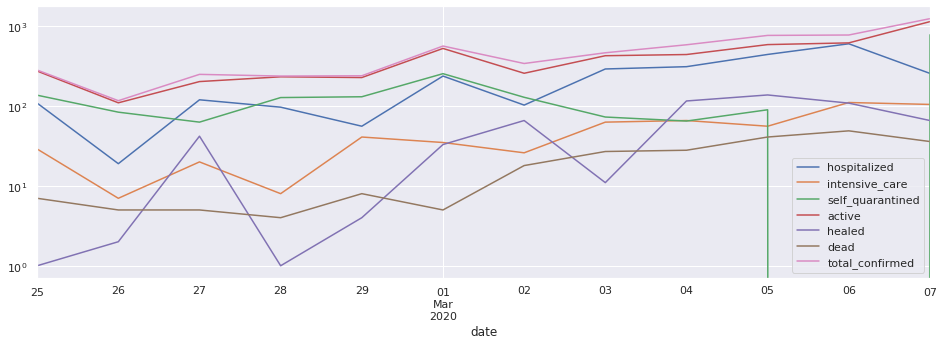

In [124]:
plt.figure()
df.plot(figsize=(16, 5), logy=True)

In [125]:
df.hospitalized / tested

date
2020-02-25    0.017513
2020-02-26    0.005650
2020-02-27    0.049444
2020-02-28    0.026352
2020-02-29    0.018881
2020-03-01    0.096513
2020-03-02    0.046438
2020-03-03    0.116288
2020-03-04    0.078372
2020-03-05    0.175842
2020-03-06    0.151113
2020-03-07    0.045064
dtype: float64

In [126]:
df.active / tested

date
2020-02-25    0.044184
2020-02-26    0.032709
2020-02-27    0.083642
2020-02-28    0.063298
2020-02-29    0.076871
2020-03-01    0.214112
2020-03-02    0.116321
2020-03-03    0.170450
2020-03-04    0.111279
2020-03-05    0.233663
2020-03-06    0.155116
2020-03-07    0.200772
dtype: float64

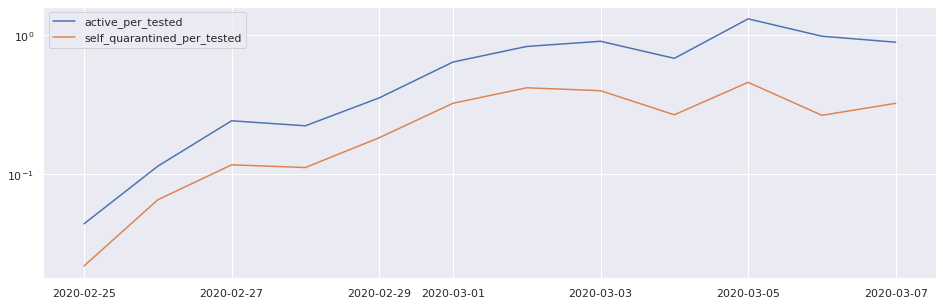

In [127]:
df_cum = df.cumsum()
plt.figure(figsize=(16, 5))
plt.plot(df_cum.index, df_cum.active/tested, label='active_per_tested')
plt.plot(df_cum.index, df_cum.self_quarantined/tested, label='self_quarantined_per_tested')

plt.yscale('log')
plt.legend(loc='best')

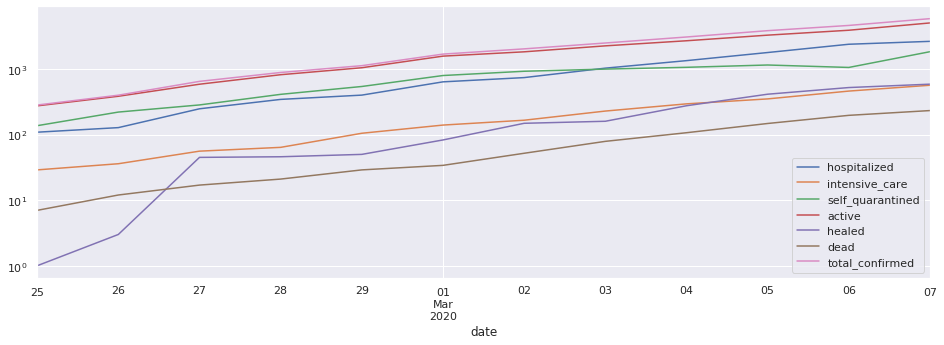

In [128]:
df_cum.plot(figsize=(16, 5), logy=True)

In [129]:
import numpy as np
from scipy.optimize import curve_fit

In [133]:
def f(x, a, b):
    return a * np.exp(b*x)

def doubf(x, a, b):
    return a * np.power(2, b * x)

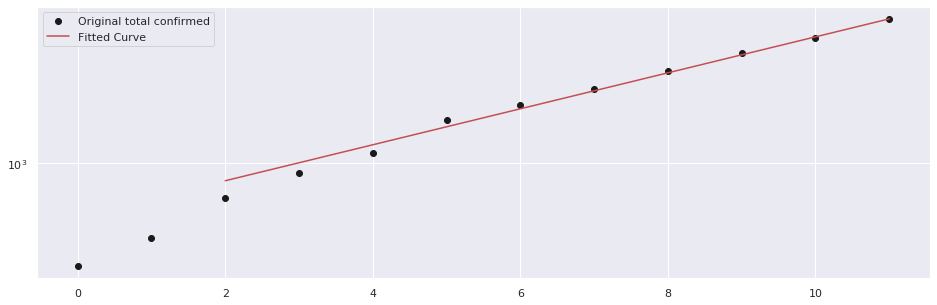

In [131]:
x = np.arange(len(df_cum.index))
popt, pcov = curve_fit(f, x[2:], df_cum.total_confirmed[2:])
plt.figure(figsize=(16, 5))
plt.plot(x, df_cum.total_confirmed, 'ko', label="Original total confirmed")
plt.plot(x[2:], f(x[2:], *popt), 'r-', label="Fitted Curve")
plt.yscale('log')
plt.legend()

In [118]:
f(10, *popt), popt

(4744.063753501335, array([5.14246128e+02, 2.22194738e-01]))

In [114]:
perr = np.diag(pcov)
perr

array([1.28148614e+03, 6.57702229e-05])

In [139]:
# base 2 exponential
x = np.arange(len(df_cum.index))
popt, pcov = curve_fit(doubf, x[2:], df_cum.total_confirmed[2:])
doubling_time = 1. / popt[1]
round(doubling_time, 2)

3.13

In [140]:
doubf(12, *popt)

7358.229897931912